## 导入库

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.0


## 下载IMDB数据集

In [2]:
NUM_WORDS = 10000
(train_data,train_labels),(test_data,test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences,dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences),dimension))
    for i ,word_indices in enumerate(sequences):
        results[i,word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

train_data = multi_hot_sequences(train_data,dimension=NUM_WORDS)#25000*10000
test_data = multi_hot_sequences(test_data,dimension=NUM_WORDS)#25000*10000

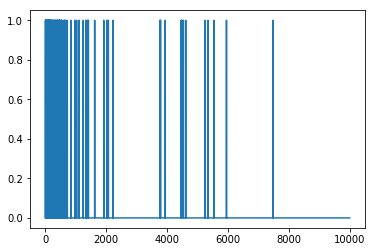

In [3]:
_ = plt.plot(train_data[0])

## 表现出过度拟合

### 创建基线模型

In [4]:
baseline_model = keras.Sequential([keras.layers.Dense(16,activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
                                  keras.layers.Dense(16,activation=tf.nn.relu),
                                  keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data,test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 7s - loss: 0.4416 - acc: 0.8230 - binary_crossentropy: 0.4416 - val_loss: 0.3064 - val_acc: 0.8817 - val_binary_crossentropy: 0.3064
Epoch 2/20
 - 6s - loss: 0.2240 - acc: 0.9192 - binary_crossentropy: 0.2240 - val_loss: 0.2844 - val_acc: 0.8870 - val_binary_crossentropy: 0.2844
Epoch 3/20
 - 6s - loss: 0.1666 - acc: 0.9422 - binary_crossentropy: 0.1666 - val_loss: 0.2987 - val_acc: 0.8828 - val_binary_crossentropy: 0.2987
Epoch 4/20
 - 6s - loss: 0.1335 - acc: 0.9550 - binary_crossentropy: 0.1335 - val_loss: 0.3298 - val_acc: 0.8767 - val_binary_crossentropy: 0.3298
Epoch 5/20
 - 6s - loss: 0.1115 - acc: 0.9626 - binary_crossentropy: 0.1115 - val_loss: 0.3638 - val_acc: 0.8698 - val_binary_crossentropy: 0.3638
Epoch 6/20
 - 6s - loss: 0.0914 - acc: 0.9718 - binary_crossentropy: 0.0914 - val_loss: 0.3987 - val_acc: 0.8672 - val_binary_crossentropy: 0.3987
Epoch 7/20
 - 6s - loss: 0.0745 - acc: 0.9790 - binary_crossentropy:

### 创建一个较小的模型
我们创建一个隐藏单元较少的模型，与我们刚刚创建的基线模型进行比较

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.6007 - acc: 0.7368 - binary_crossentropy: 0.6007 - val_loss: 0.5035 - val_acc: 0.8382 - val_binary_crossentropy: 0.5035
Epoch 2/20
 - 6s - loss: 0.4055 - acc: 0.8793 - binary_crossentropy: 0.4055 - val_loss: 0.3747 - val_acc: 0.8706 - val_binary_crossentropy: 0.3747
Epoch 3/20
 - 6s - loss: 0.2979 - acc: 0.9062 - binary_crossentropy: 0.2979 - val_loss: 0.3175 - val_acc: 0.8851 - val_binary_crossentropy: 0.3175
Epoch 4/20
 - 6s - loss: 0.2416 - acc: 0.9219 - binary_crossentropy: 0.2416 - val_loss: 0.2946 - val_acc: 0.8880 - val_binary_crossentropy: 0.2946
Epoch 5/20
 - 6s - loss: 0.2073 - acc: 0.9323 - binary_crossentropy: 0.2073 - val_loss: 0.2865 - val_acc: 0.8876 - val_binary_crossentropy: 0.2865
Epoch 6/20
 - 6s - loss: 0.1827 - acc: 0.9397 - binary_crossentropy: 0.1827 - val_loss: 0.2830 - val_acc: 0.8887 - val_binary_crossentropy: 0.2830
Epoch 7/20
 - 6s - loss: 0.1636 - acc: 0.9475 - binary_crossentropy:

### 创建一个更大的模型

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 17s - loss: 0.3464 - acc: 0.8486 - binary_crossentropy: 0.3464 - val_loss: 0.2978 - val_acc: 0.8784 - val_binary_crossentropy: 0.2978
Epoch 2/20
 - 16s - loss: 0.1440 - acc: 0.9467 - binary_crossentropy: 0.1440 - val_loss: 0.3510 - val_acc: 0.8658 - val_binary_crossentropy: 0.3510
Epoch 3/20
 - 16s - loss: 0.0522 - acc: 0.9843 - binary_crossentropy: 0.0522 - val_loss: 0.4170 - val_acc: 0.8713 - val_binary_crossentropy: 0.4170
Epoch 4/20
 - 16s - loss: 0.0094 - acc: 0.9986 - binary_crossentropy: 0.0094 - val_loss: 0.5730 - val_acc: 0.8709 - val_binary_crossentropy: 0.5730
Epoch 5/20
 - 13s - loss: 0.0010 - acc: 1.0000 - binary_crossentropy: 0.0010 - val_loss: 0.6694 - val_acc: 0.8709 - val_binary_crossentropy: 0.6694
Epoch 6/20
 - 13s - loss: 2.7152e-04 - acc: 1.0000 - binary_crossentropy: 2.7152e-04 - val_loss: 0.7056 - val_acc: 0.8718 - val_binary_crossentropy: 0.7056
Epoch 7/20
 - 14s - loss: 1.5782e-04 - acc: 1.0000 - b

## 绘制训练和验证阶段的损失图

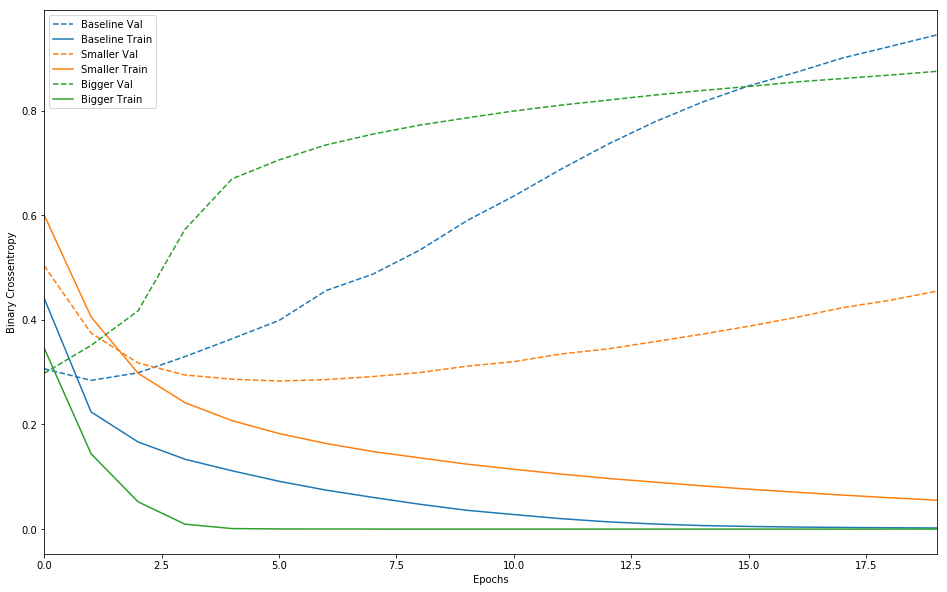

In [10]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

## 策略

### 添加权重正则化(减小网络复杂度)
- L2 regularization（权重衰减）
L2正则化就是在代价函数后面再加上一个正则化项：
<img src="9WnBBu1.jpg" style="width:193px;height:78px;">
C0代表原始的代价函数，后面那一项就是L2正则化项，它是这样来的：所有参数w的平方的和，除以训练集的样本大小n。λ就是正则项系数，权衡正则项与C0项的比重。另外还有一个系数1/2，1/2经常会看到，主要是为了后面求导的结果方便，后面那一项求导会产生一个2，与1/2相乘刚好凑整。
L2正则化项是怎么避免overfitting的呢？我们推导一下看看，先求导：
<img src="mebEC90.jpg" style="width:216px;height:134px;">
可以发现L2正则化项对b的更新没有影响，但是对于w的更新有影响:
<img src="qM83geg.jpg" style="width:314px;height:128px;">
在不使用L2正则化时，求导结果中w前系数为1，现在w前面系数为 1−ηλ/n ，因为η、λ、n都是正的，所以 1−ηλ/n小于1，它的效果是减小w，这也就是权重衰减（weight decay）的由来。当然考虑到后面的导数项，w最终的值可能增大也可能减小。

另外，需要提一下，对于基于mini-batch的随机梯度下降，w和b更新的公式跟上面给出的有点不同：
<img src="Xs2p2EN.jpg" style="width:296px;height:86px;">
<img src="yDETU7x.jpg" style="width:215px;height:57px;">
对比上面w的更新公式，可以发现后面那一项变了，变成所有导数加和，乘以η再除以m，m是一个mini-batch中样本的个数。

到目前为止，我们只是解释了L2正则化项有让w“变小”的效果，但是还没解释为什么w“变小”可以防止overfitting？一个所谓“显而易见”的解释就是：更小的权值w，从某种意义上说，表示网络的复杂度更低，对数据的拟合刚刚好（这个法则也叫做奥卡姆剃刀），而在实际应用中，也验证了这一点，L2正则化的效果往往好于未经正则化的效果。当然，对于很多人（包括我）来说，这个解释似乎不那么显而易见，所以这里添加一个稍微数学一点的解释（引自知乎）：

过拟合的时候，拟合函数的系数往往非常大，为什么？如下图所示，过拟合，就是拟合函数需要顾忌每一个点，最终形成的拟合函数波动很大。在某些很小的区间里，函数值的变化很剧烈。这就意味着函数在某些小区间里的导数值（绝对值）非常大，由于自变量值可大可小，所以只有系数足够大，才能保证导数值很大。
<img src="RsR5cOK.png" style="width:223px;height:216px;">
而正则化是通过约束参数的范数使其不要太大，所以可以在一定程度上减少过拟合情况。

In [13]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy','binary_crossentropy'])
l2_model_history = l2_model.fit(train_data,train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data,test_labels),
                                verbose=2) 

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 14s - loss: 0.5135 - acc: 0.8038 - binary_crossentropy: 0.4717 - val_loss: 0.3777 - val_acc: 0.8776 - val_binary_crossentropy: 0.3344
Epoch 2/20
 - 9s - loss: 0.3043 - acc: 0.9090 - binary_crossentropy: 0.2574 - val_loss: 0.3352 - val_acc: 0.8871 - val_binary_crossentropy: 0.2856
Epoch 3/20
 - 9s - loss: 0.2564 - acc: 0.9277 - binary_crossentropy: 0.2047 - val_loss: 0.3368 - val_acc: 0.8856 - val_binary_crossentropy: 0.2835
Epoch 4/20
 - 9s - loss: 0.2322 - acc: 0.9390 - binary_crossentropy: 0.1774 - val_loss: 0.3466 - val_acc: 0.8834 - val_binary_crossentropy: 0.2909
Epoch 5/20
 - 9s - loss: 0.2195 - acc: 0.9447 - binary_crossentropy: 0.1622 - val_loss: 0.3590 - val_acc: 0.8800 - val_binary_crossentropy: 0.3009
Epoch 6/20
 - 9s - loss: 0.2071 - acc: 0.9504 - binary_crossentropy: 0.1483 - val_loss: 0.3720 - val_acc: 0.8765 - val_binary_crossentropy: 0.3128
Epoch 7/20
 - 8s - loss: 0.2007 - acc: 0.9518 - binary_crossentropy

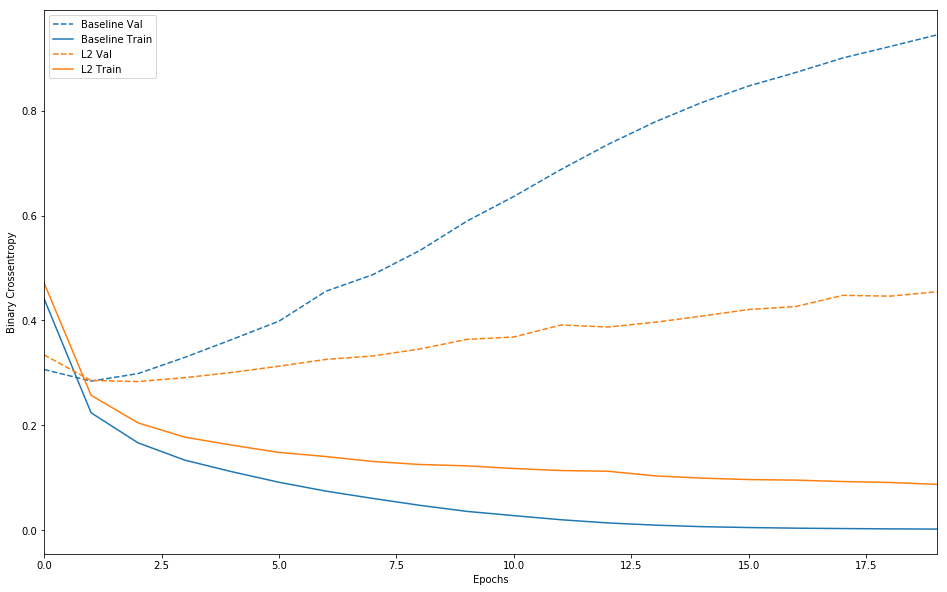

In [14]:
plot_history([('baseline',baseline_history),('l2',l2_model_history)])

## Dropout

L1、L2正则化是通过修改代价函数来实现的，而Dropout则是通过修改神经网络本身来实现的，它是在训练网络时用的一种技巧（trike）。它的流程如下：
<img src="ZQvkoMn.png" style="width:310px;height:324px;">
假设我们要训练上图这个网络，在训练开始时，我们随机地“删除”一半的隐层单元，视它们为不存在，得到如下的网络：
<img src="G9QTbi9.png" style="width:310px;height:324px">
保持输入输出层不变，按照BP算法更新上图神经网络中的权值（虚线连接的单元不更新，因为它们被“临时删除”了）。

以上就是一次迭代的过程，在第二次迭代中，也用同样的方法，只不过这次删除的那一半隐层单元，跟上一次删除掉的肯定是不一样的，因为我们每一次迭代都是“随机”地去删掉一半。第三次、第四次……都是这样，直至训练结束。

以上就是Dropout，它为什么有助于防止过拟合呢？可以简单地这样解释，运用了dropout的训练过程，相当于训练了很多个只有半数隐层单元的神经网络（后面简称为“半数网络”），每一个这样的半数网络，都可以给出一个分类结果，这些结果有的是正确的，有的是错误的。随着训练的进行，大部分半数网络都可以给出正确的分类结果，那么少数的错误分类结果就不会对最终结果造成大的影响。

In [19]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
dpt_model.compile(optimizer='adam',loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])
dpt_model_history = dpt_model.fit(train_data,train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data,test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 12s - loss: 0.6172 - acc: 0.6468 - binary_crossentropy: 0.6172 - val_loss: 0.4627 - val_acc: 0.8573 - val_binary_crossentropy: 0.4627
Epoch 2/20
 - 10s - loss: 0.4334 - acc: 0.8220 - binary_crossentropy: 0.4334 - val_loss: 0.3246 - val_acc: 0.8847 - val_binary_crossentropy: 0.3246
Epoch 3/20
 - 10s - loss: 0.3295 - acc: 0.8828 - binary_crossentropy: 0.3295 - val_loss: 0.2881 - val_acc: 0.8877 - val_binary_crossentropy: 0.2881
Epoch 4/20
 - 10s - loss: 0.2773 - acc: 0.9097 - binary_crossentropy: 0.2773 - val_loss: 0.2785 - val_acc: 0.8871 - val_binary_crossentropy: 0.2785
Epoch 5/20
 - 10s - loss: 0.2369 - acc: 0.9258 - binary_crossentropy: 0.2369 - val_loss: 0.2805 - val_acc: 0.8856 - val_binary_crossentropy: 0.2805
Epoch 6/20
 - 10s - loss: 0.2045 - acc: 0.9356 - binary_crossentropy: 0.2045 - val_loss: 0.2917 - val_acc: 0.8847 - val_binary_crossentropy: 0.2917
Epoch 7/20
 - 10s - loss: 0.1815 - acc: 0.9456 - binary_crosse

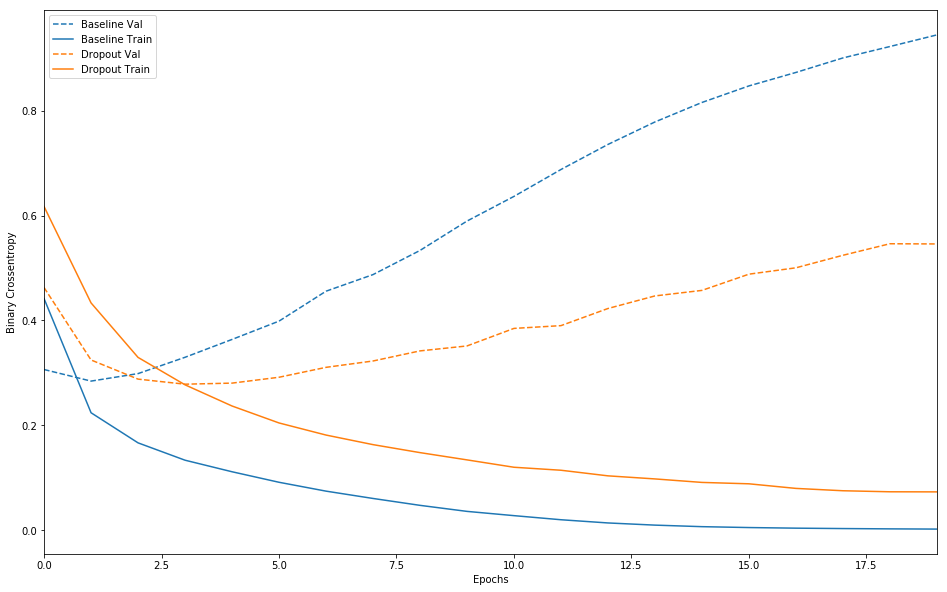

In [21]:
plot_history([('baseline',baseline_history),('dropout',dpt_model_history)])

L1 regularization
在原始的代价函数后面加上一个L1正则化项，即所有权重w的绝对值的和，乘以λ/n（这里不像L2正则化项那样，需要再乘以1/2，具体原因上面已经说过。）
<img src="6jbxq15.jpg" style="width:294px;height:102px">
同样先计算导数：
<img src="kju5RTZ.jpg" style="width:241px;height:87px">
上式中sgn(w)表示w的符号。那么权重w的更新规则为：
<img src="HCkJZYl.jpg" style="width:319px;height:108px">
比原始的更新规则多出了η * λ * sgn(w)/n这一项。当w为正时，更新后的w变小。当w为负时，更新后的w变大——因此它的效果就是让w往0靠，使网络中的权重尽可能为0，也就相当于减小了网络复杂度，防止过拟合。

另外，上面没有提到一个问题，当w为0时怎么办？当w等于0时，|W|是不可导的，所以我们只能按照原始的未经正则化的方法去更新w，这就相当于去掉η*λ*sgn(w)/n这一项，所以我们可以规定sgn(0)=0，这样就把w=0的情况也统一进来了。（在编程的时候，令sgn(0)=0,sgn(w>0)=1,sgn(w<0)=-1）



In [26]:
l1_model = keras.models.Sequential([
    keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l1(0.001),
                       activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l1(0.001),
                      activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

l1_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','binary_crossentropy'])

l1_model_history = l1_model.fit(train_data,train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data,test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 7s - loss: 1.1332 - acc: 0.7532 - binary_crossentropy: 0.6016 - val_loss: 0.6470 - val_acc: 0.8318 - val_binary_crossentropy: 0.4819
Epoch 2/20
 - 6s - loss: 0.5739 - acc: 0.8476 - binary_crossentropy: 0.4105 - val_loss: 0.5378 - val_acc: 0.8562 - val_binary_crossentropy: 0.3696
Epoch 3/20
 - 5s - loss: 0.5177 - acc: 0.8610 - binary_crossentropy: 0.3465 - val_loss: 0.5118 - val_acc: 0.8614 - val_binary_crossentropy: 0.3411
Epoch 4/20
 - 5s - loss: 0.4941 - acc: 0.8702 - binary_crossentropy: 0.3238 - val_loss: 0.5039 - val_acc: 0.8615 - val_binary_crossentropy: 0.3338
Epoch 5/20
 - 5s - loss: 0.4826 - acc: 0.8736 - binary_crossentropy: 0.3131 - val_loss: 0.4848 - val_acc: 0.8689 - val_binary_crossentropy: 0.3190
Epoch 6/20
 - 5s - loss: 0.4727 - acc: 0.8768 - binary_crossentropy: 0.3060 - val_loss: 0.4796 - val_acc: 0.8714 - val_binary_crossentropy: 0.3138
Epoch 7/20
 - 5s - loss: 0.4608 - acc: 0.8809 - binary_crossentropy:

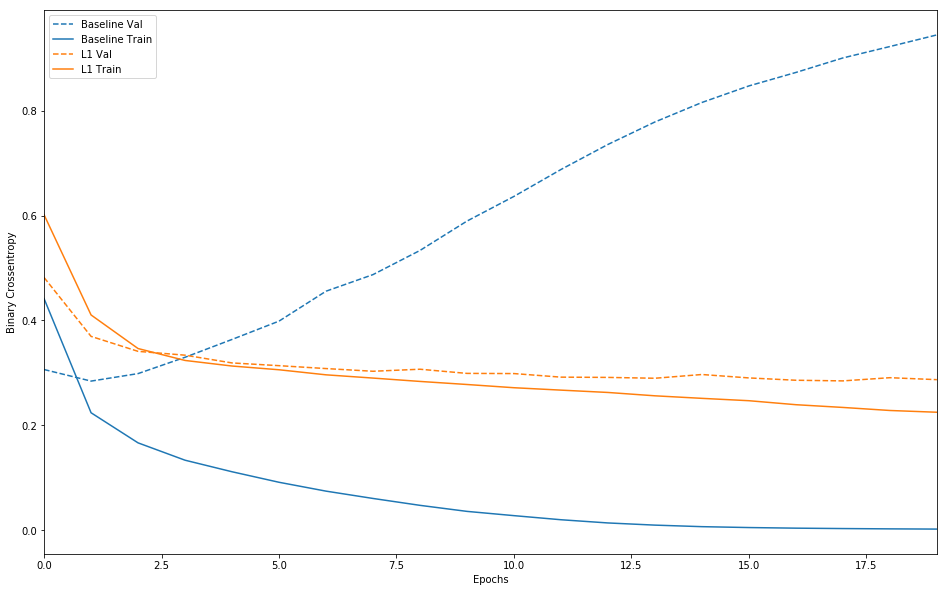

In [27]:
plot_history([('baseline',baseline_history),('l1',l1_model_history)])